In [6]:
import numpy as np
import pandas as pd

**Adding dataset, exploring it, and removing values that aren't consistent throughout**

As of May 27, 2020 (because the dataset is updated each day)

* 212 locations (countries?) represented, with 20128 individual entries
* 

In [10]:
covid = pd.read_csv("owid-covid-data.csv")

In [11]:
covid.head()

iso_code location        date  total_cases  new_cases  total_deaths  \
0      ABW    Aruba  2020-03-13            2          2             0   
1      ABW    Aruba  2020-03-20            4          2             0   
2      ABW    Aruba  2020-03-24           12          8             0   
3      ABW    Aruba  2020-03-25           17          5             0   
4      ABW    Aruba  2020-03-26           19          2             0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0           0                   18.733                 18.733   
1           0                   37.465                 18.733   
2           0                  112.395                 74.930   
3           0                  159.227                 46.831   
4           0                  177.959                 18.733   

   total_deaths_per_million  ...  aged_65_older  aged_70_older  \
0                       0.0  ...         13.085          7.452   
1                       0.0  ...         13.085          7.452   
2                       0.0  ...         13.085          7.452   
3                       0.0  ...         13.085          7.452   
4                       0.0  ...         13.085          7.452   

   gdp_per_capita  extreme_poverty  cvd_death_rate  diabetes_prevalence  \
0       35973.781              NaN             NaN                11.62   
1       35973.781              NaN             NaN                11.62   
2       35973.781              NaN             NaN                11.62   
3       35973.781              NaN             NaN                11.62   
4       35973.781              NaN             NaN                11.62   

   female_smokers male_smokers  handwashing_facilities  hospital_beds_per_100k  
0             NaN          NaN                     NaN                     NaN  
1             NaN          NaN                     NaN                     NaN  
2             NaN          NaN                     NaN                     NaN  
3             NaN          NaN                     NaN                     NaN  
4             NaN          NaN                     NaN                     NaN  

[5 rows x 32 columns]

In [12]:
covid.shape # gives #rows, #cols

(20128, 32)

In [14]:
covid.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [16]:
covid['location'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [17]:
len(covid['location'].unique())

212

In [21]:
covid['location'].value_counts()[:20]

Italy          149
Iran           149
Russia         149
Iceland        149
Nepal          149
Mexico         149
South Korea    149
Australia      149
Vietnam        149
World          149
Brazil         149
Switzerland    149
Malaysia       149
Israel         149
Croatia        149
Canada         149
France         149
Netherlands    149
Germany        149
Estonia        149
Name: location, dtype: int64

In [44]:
america = covid.loc[covid['location']=='United States', ['date', 'total_cases', 'total_deaths']]
america.shape

(149, 3)

In [48]:
america.head()

date  total_cases  total_deaths
18835  2019-12-31            0             0
18836  2020-01-01            0             0
18837  2020-01-02            0             0
18838  2020-01-03            0             0
18839  2020-01-04            0             0

In [45]:
caserange = pd.cut(america['total_cases'],10) # divides rating col into 10 equal ranges
pd.value_counts(caserange)

(-1681.212, 168121.2]     92
(1513090.8, 1681212.0]     8
(1344969.6, 1513090.8]     8
(1176848.4, 1344969.6]     7
(1008727.2, 1176848.4]     6
(840606.0, 1008727.2]      6
(504363.6, 672484.8]       6
(336242.4, 504363.6]       6
(672484.8, 840606.0]       5
(168121.2, 336242.4]       5
Name: total_cases, dtype: int64

In [46]:
import seaborn as sns

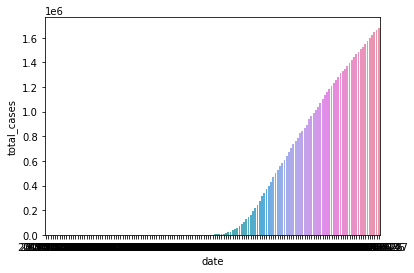

In [47]:
ax = sns.barplot(x = "date", y="total_cases", data=america)

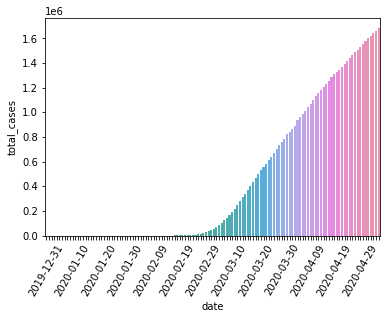

In [64]:
temp = america[america['total_cases'] > 0]
ax = sns.barplot(x = "date", y="total_cases", data=temp)
ax.set_xticklabels(america.date,rotation=60)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

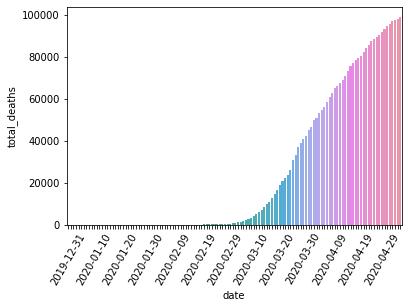

In [65]:
ax = sns.barplot(x = "date", y="total_deaths", data=temp)
ax.set_xticklabels(america.date,rotation=60)
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 10) != 0:
        t.set_visible(False)

In [66]:
# how to get deaths and total cases on the same plot?